In [2]:
pwd

'/content'

IMPORT LIBRARIES


In [3]:
import pandas as pd
import numpy as np

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

LOAD DATASET

In [7]:
cust_data = pd.read_csv('Churn_Modelling.csv', header = 0, engine = 'python')

In [8]:
cust_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
cust_data.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
cust_data.shape

(10000, 14)

In [11]:
cust_data.size

140000

In [12]:
cust_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


REMOVE DUPLICATES AND NULL VALUES FROM THE DAATASET

In [14]:
cust_data.isnull().values.any()

False

In [15]:
cust_data = cust_data.drop_duplicates()

In [16]:
cust_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
cust_data.index

RangeIndex(start=0, stop=10000, step=1)

In [18]:
print(cust_data["Geography"].unique())
print(cust_data["Gender"].unique())
print(cust_data["NumOfProducts"].unique())
print(cust_data["HasCrCard"].unique())
print(cust_data["IsActiveMember"].unique())
print(cust_data["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [19]:
cust_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [20]:
cust_data.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [21]:
cust_data.iloc[0:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
cust_data.loc[:, "CustomerId"]

,CustomerId
0,15634602
1,15647311
2,15619304
3,15701354
4,15737888
...,...
9995,15606229
9996,15569892
9997,15584532
9998,15682355


VISUALIZATION OF DATASET

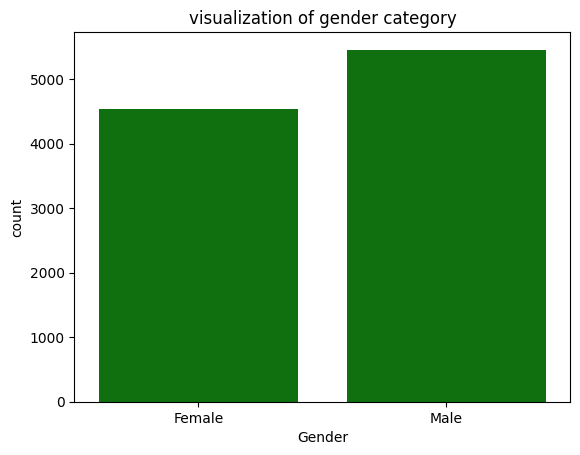

In [24]:
sns.countplot(x = 'Gender', data = cust_data, color = 'green')
plt.title("visualization of gender category")
plt.show()

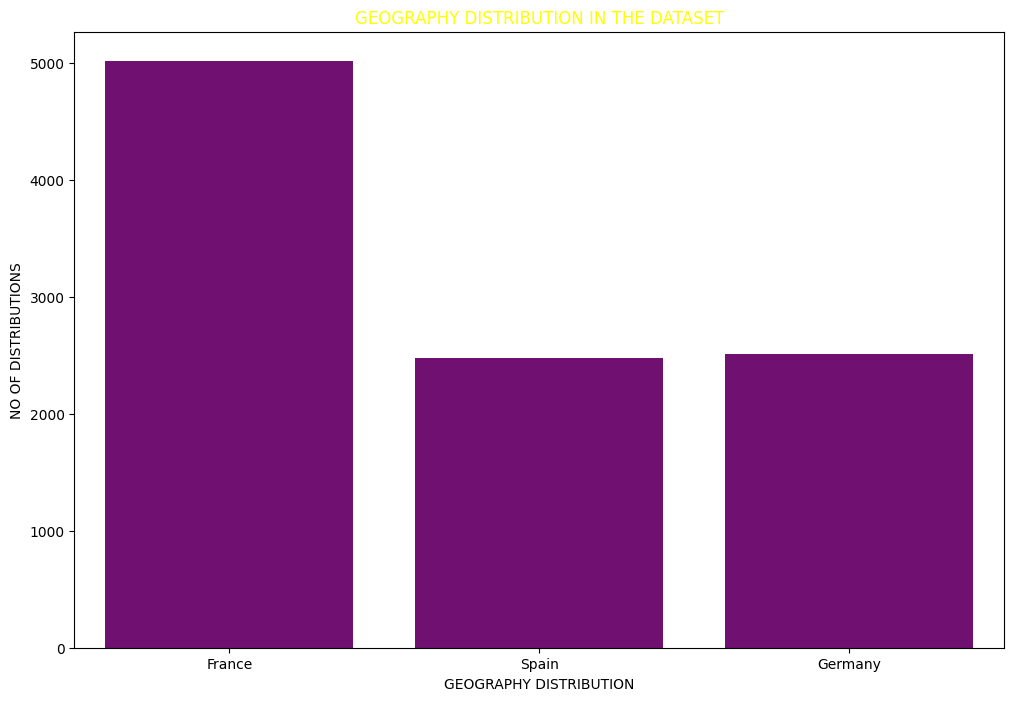

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Geography", data=cust_data, color = 'purple')
plt.xlabel("GEOGRAPHY DISTRIBUTION")
plt.ylabel("NO OF DISTRIBUTIONS")
plt.title("GEOGRAPHY DISTRIBUTION IN THE DATASET", color='yellow')
plt.show()

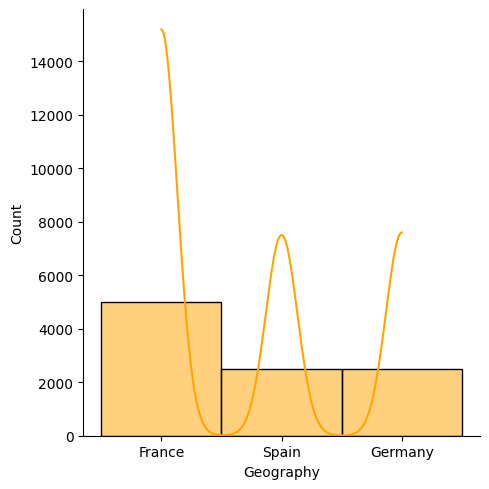

In [28]:
sns.displot(cust_data.Geography, kde = True, color='orange')

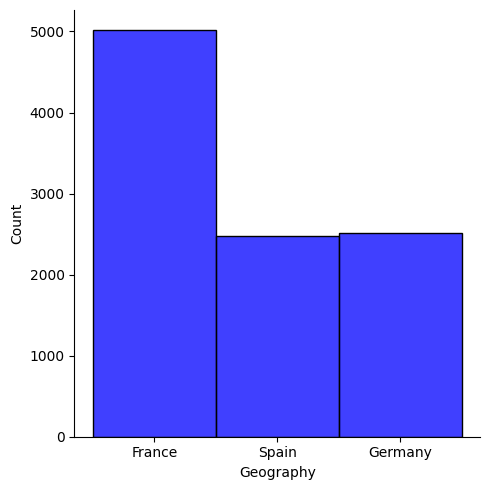

In [29]:
sns.displot(cust_data.Geography, color = 'blue')

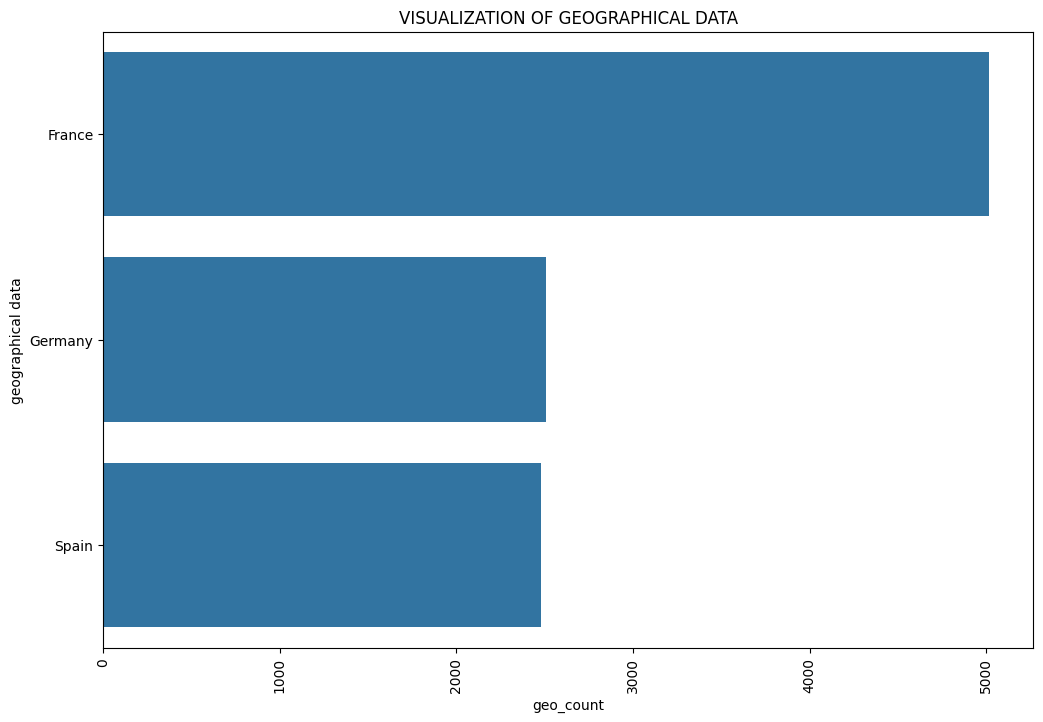

In [30]:
plt.figure(figsize=(12,8))
geo_count = cust_data.Geography.value_counts()
sns.barplot(x = geo_count, y= geo_count.index, orient='h')
plt.xlabel("geo_count")
plt.ylabel("geographical data")
plt.title("VISUALIZATION OF GEOGRAPHICAL DATA")
plt.xticks(rotation=90)
plt.show()

In [32]:

for col in cust_data.columns:
    if cust_data[col].dtype == 'object':
        try:
            cust_data[col] = pd.to_numeric(cust_data[col], errors='coerce')
        except:
            pass


correlation_matrix = cust_data.select_dtypes(include=['number']).corr()

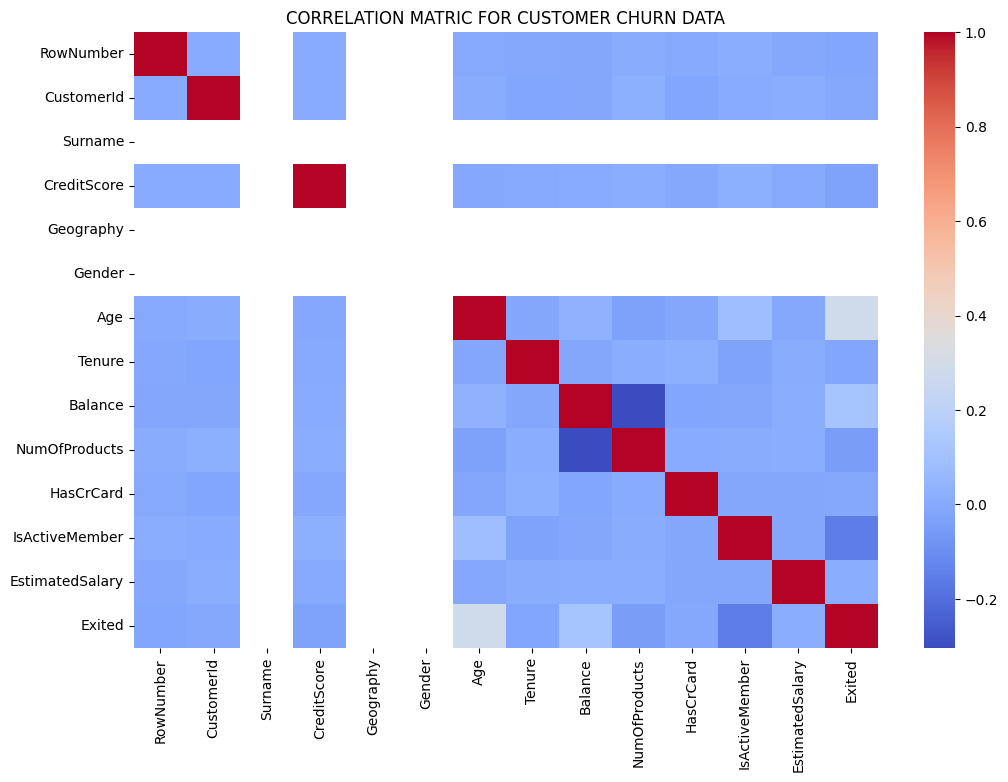

In [33]:
correlation_matrix = cust_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot = False, fmt = ".2f")
plt.title("CORRELATION MATRIC FOR CUSTOMER CHURN DATA")
plt.show()

PREPROCEESING THE DATA

In [34]:
cust_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,NaN,619,NaN,NaN,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,NaN,608,NaN,NaN,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,NaN,502,NaN,NaN,42,8,159660.80,3,1,0,113931.57,1


In [35]:
cust_data.drop(labels = ["RowNumber","CustomerId","Surname"], axis = 1, inplace=True)

In [36]:
cust_data = pd.get_dummies(cust_data, drop_first = True)
cust_data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,NaN,NaN,42,2,0.00,1,1,1,101348.88,1
1,608,NaN,NaN,41,1,83807.86,1,0,1,112542.58,0
2,502,NaN,NaN,42,8,159660.80,3,1,0,113931.57,1


In [37]:
x = cust_data.drop("Exited", axis=1)
y = cust_data["Exited"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=45)

In [40]:
new_scaler = StandardScaler()
x_train = new_scaler.fit_transform(x_train)
x_test = new_scaler.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [42]:
from sklearn.impute import SimpleImputer

In [45]:
cust_data = cust_data.dropna()

TRAINING OF LOGISTIC REGRESSION MODEL

In [47]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)  # Fit and transform training data
x_test = imputer.transform(x_test)        # Transform test data using the same imputer

nlr_model = LogisticRegression()
nlr_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LogisticRegression()

In [48]:
nlr_predictions = nlr_model.predict(x_test)

In [52]:
print("LOGISTIC REGRESSION MODEL FOR CUSTOMER CHURN DATA:")
print(confusion_matrix(y_test, nlr_predictions))
print(classification_report(y_test, nlr_predictions))
print("Accuracy;", accuracy_score(y_test,nlr_predictions))
print("r2_score:", r2_score(y_test,nlr_predictions))
print("Precision_score:",precision_score(y_test,nlr_predictions))
print("Recall_score:",recall_score(y_test,nlr_predictions))
print("f1_score:",f1_score(y_test,nlr_predictions))

LOGISTIC REGRESSION MODEL FOR CUSTOMER CHURN DATA:
[[1938   50]
 [ 419   93]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1988
           1       0.65      0.18      0.28       512

    accuracy                           0.81      2500
   macro avg       0.74      0.58      0.59      2500
weighted avg       0.79      0.81      0.77      2500

Accuracy; 0.8124
r2_score: -0.15193111795774628
Precision_score: 0.6503496503496503
Recall_score: 0.181640625
f1_score: 0.28396946564885495


TRAIN RANDOM FOREST MODEL FOR CUSTOMER CHURN PREDICTION

In [53]:
rfm_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)


In [54]:
rfm_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [55]:
rfm_predictions = rfm_model.predict(x_test)

In [56]:
print("RANDOM FOREST MODEL FOR CUSTOMER CHURN DATA:")
print(confusion_matrix(y_test, rfm_predictions))
print(classification_report(y_test, rfm_predictions))
print("Accuracy;", accuracy_score(y_test,rfm_predictions))
print("r2_score:", r2_score(y_test,rfm_predictions))
print("Precision_score:",precision_score(y_test,rfm_predictions))
print("Recall_score:",recall_score(y_test,rfm_predictions))
print("f1_score:",f1_score(y_test,rfm_predictions))

RANDOM FOREST MODEL FOR CUSTOMER CHURN DATA:
[[1911   77]
 [ 296  216]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1988
           1       0.74      0.42      0.54       512

    accuracy                           0.85      2500
   macro avg       0.80      0.69      0.72      2500
weighted avg       0.84      0.85      0.83      2500

Accuracy; 0.8508
r2_score: 0.08385862047283721
Precision_score: 0.7372013651877133
Recall_score: 0.421875
f1_score: 0.5366459627329193


TRAINING GRADIENT BOOSTING MODEL

In [57]:
gbm_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02, max_depth=2, random_state=45)
gbm_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=2, n_estimators=1000,
                           random_state=45)

In [58]:
gbm_predictions = gbm_model.predict(x_test)

In [59]:
print("GRADIENT BOOSTING MODEL FOR CUSTOMER CHURN DATA:")
print(confusion_matrix(y_test, gbm_predictions))
print(classification_report(y_test,gbm_predictions))
print("Accuracy;", accuracy_score(y_test,gbm_predictions))
print("r2_score:", r2_score(y_test,gbm_predictions))
print("Precision_score:",precision_score(y_test,gbm_predictions))
print("Recall_score:",recall_score(y_test,gbm_predictions))
print("f1_score:",f1_score(y_test,gbm_predictions))

GRADIENT BOOSTING MODEL FOR CUSTOMER CHURN DATA:
[[1935   53]
 [ 301  211]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1988
           1       0.80      0.41      0.54       512

    accuracy                           0.86      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500

Accuracy; 0.8584
r2_score: 0.13052533953722345
Precision_score: 0.7992424242424242
Recall_score: 0.412109375
f1_score: 0.5438144329896907
